In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/heart_statlog_cleveland_hungary_final.csv')

print(df.head())


   age  sex  chest pain type  resting bp s  cholesterol  fasting blood sugar  \
0   40    1                2           140          289                    0   
1   49    0                3           160          180                    0   
2   37    1                2           130          283                    0   
3   48    0                4           138          214                    0   
4   54    1                3           150          195                    0   

   resting ecg  max heart rate  exercise angina  oldpeak  ST slope  target  
0            0             172                0      0.0         1       0  
1            0             156                0      1.0         2       1  
2            1              98                0      0.0         1       0  
3            0             108                1      1.5         2       1  
4            0             122                0      0.0         1       0  


In [ ]:
# Generar estadísticas descriptivas
print(df.describe())

               age          sex  chest pain type  resting bp s  cholesterol  \
count  1190.000000  1190.000000      1190.000000   1190.000000  1190.000000   
mean     53.720168     0.763866         3.232773    132.153782   210.363866   
std       9.358203     0.424884         0.935480     18.368823   101.420489   
min      28.000000     0.000000         1.000000      0.000000     0.000000   
25%      47.000000     1.000000         3.000000    120.000000   188.000000   
50%      54.000000     1.000000         4.000000    130.000000   229.000000   
75%      60.000000     1.000000         4.000000    140.000000   269.750000   
max      77.000000     1.000000         4.000000    200.000000   603.000000   

       fasting blood sugar  resting ecg  max heart rate  exercise angina  \
count          1190.000000  1190.000000     1190.000000      1190.000000   
mean              0.213445     0.698319      139.732773         0.387395   
std               0.409912     0.870359       25.517636     

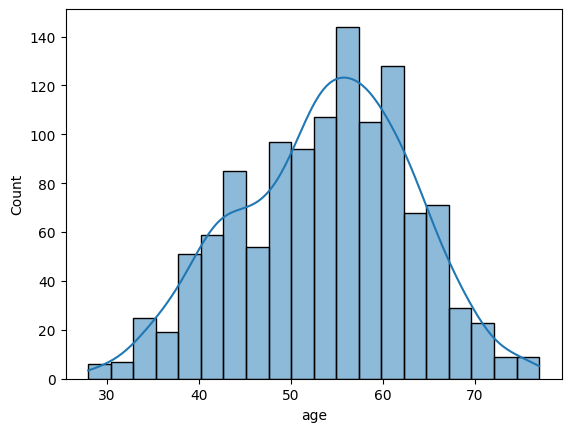

In [ ]:
# Visualizar las distribuciones de las variables
sns.histplot(df['age'], kde=True)
plt.show()

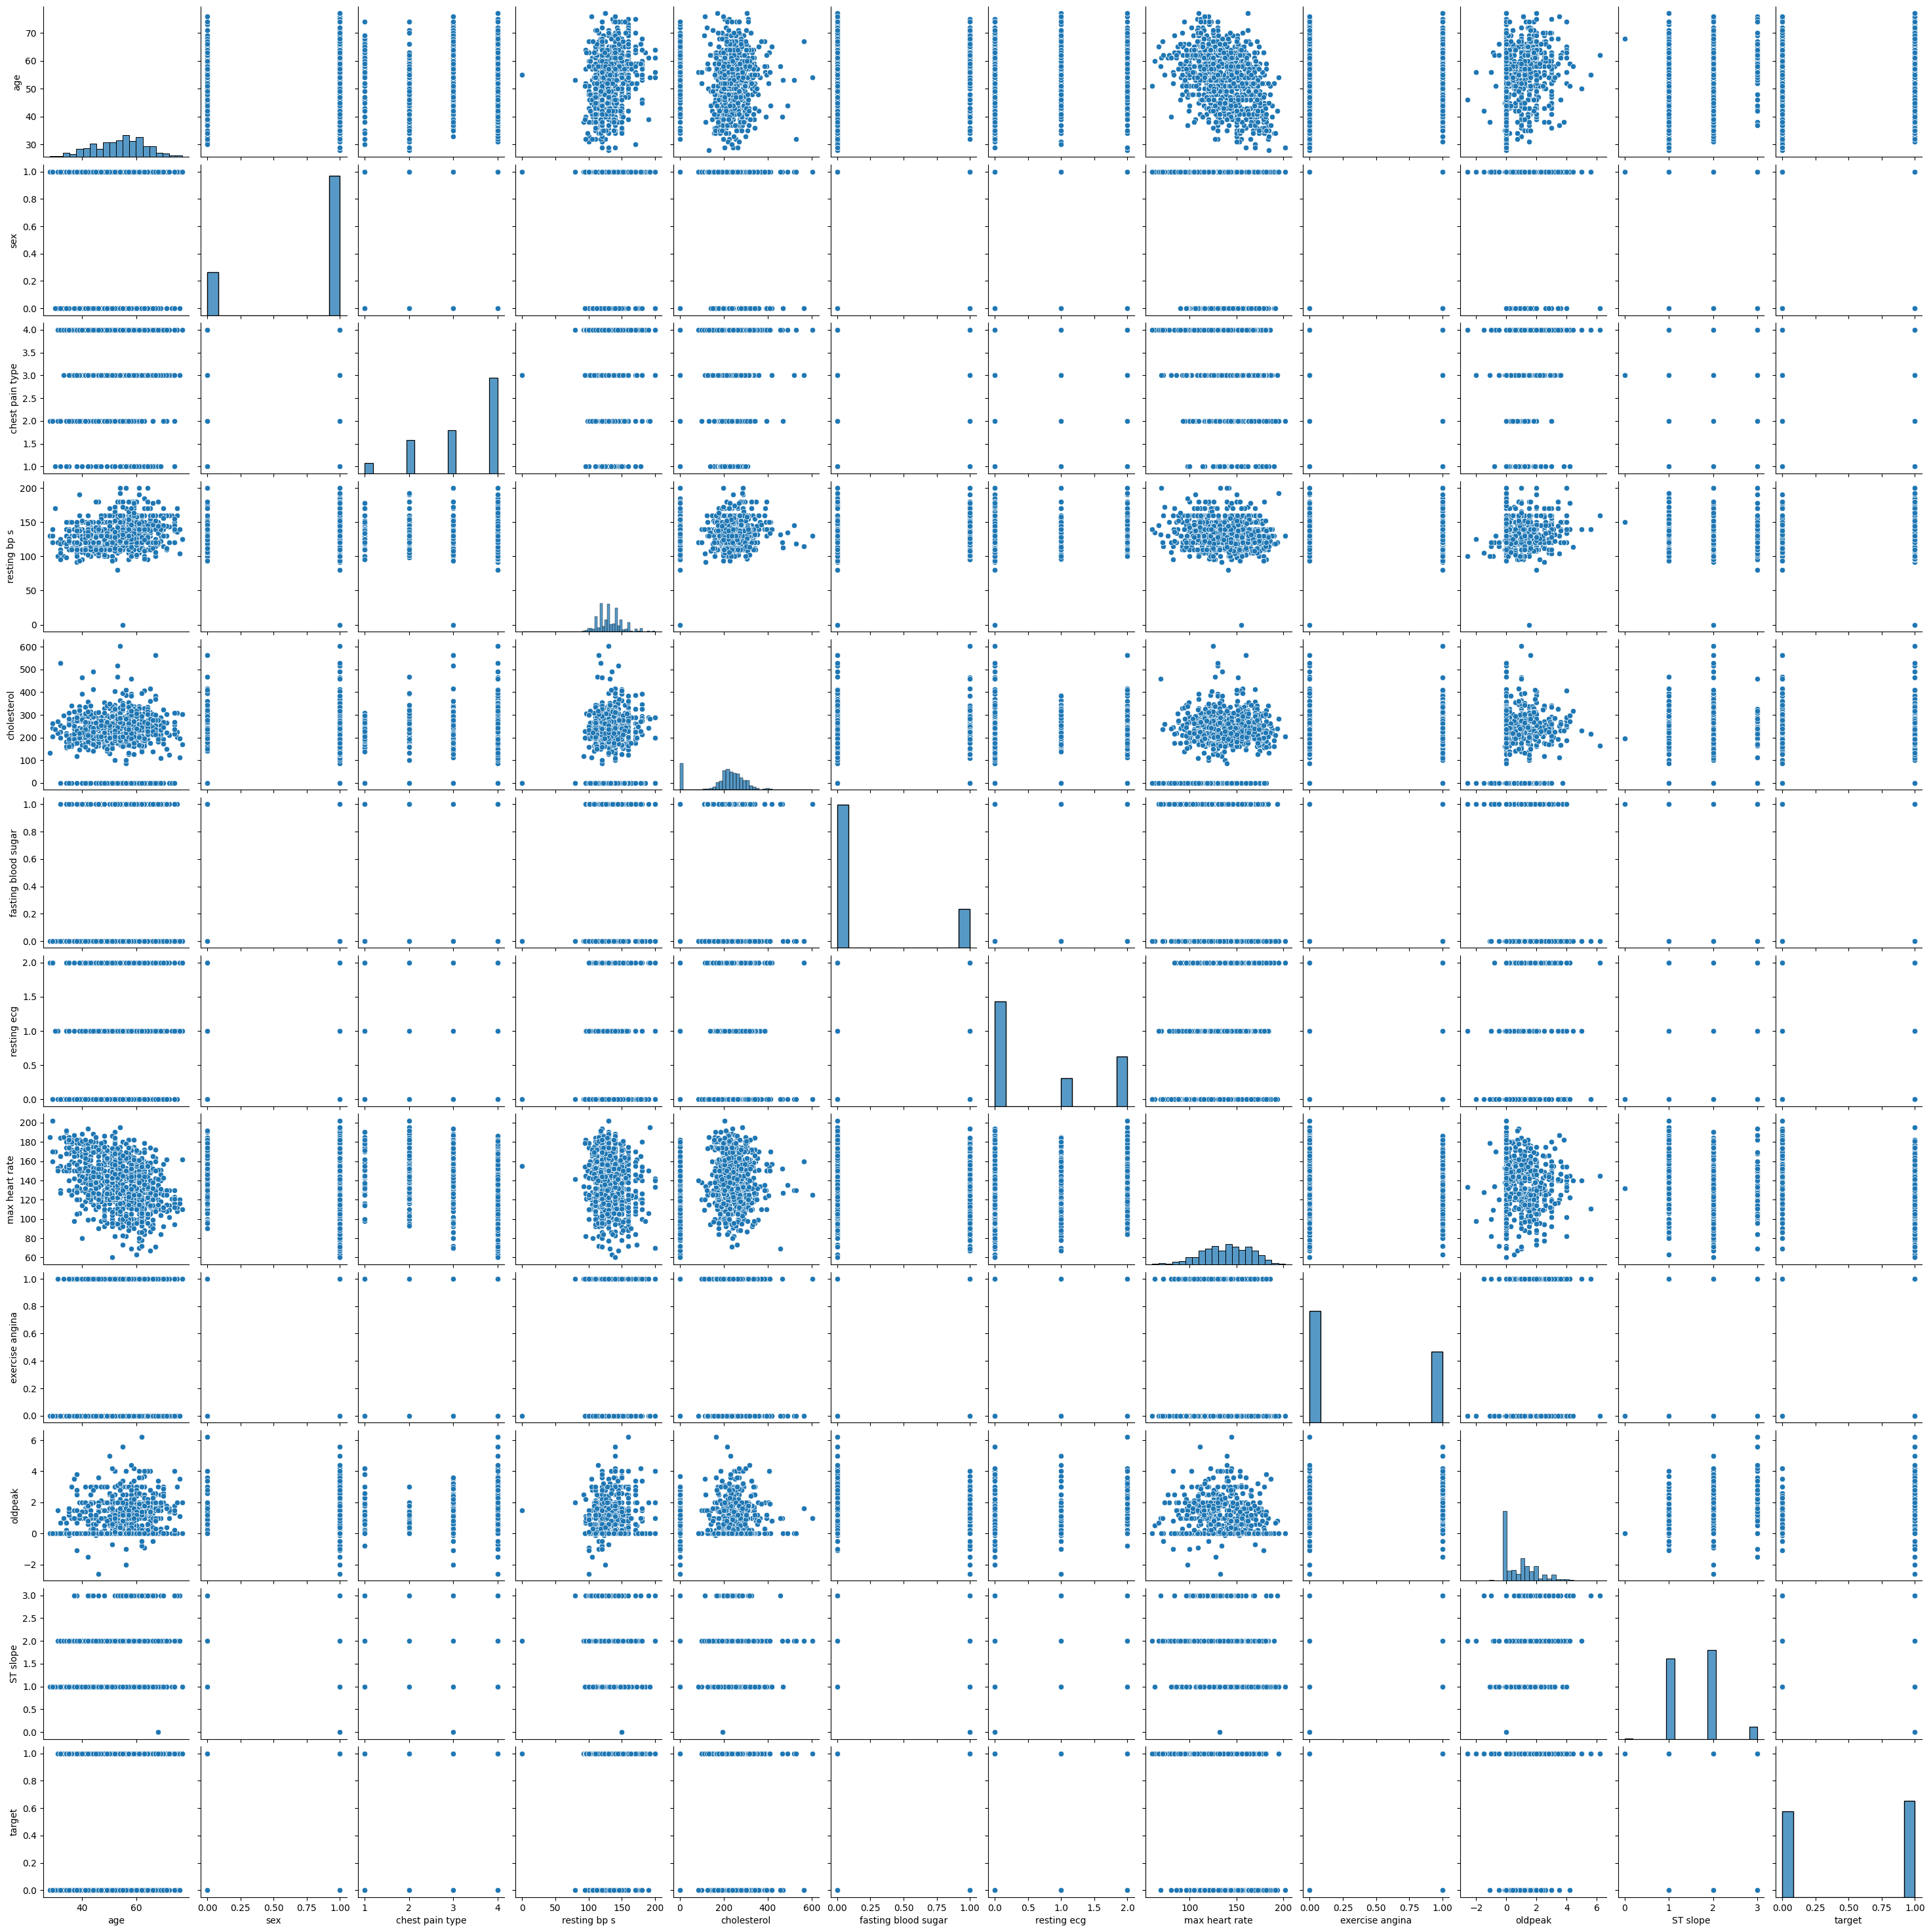

In [ ]:
# Examinar las relaciones entre las variables
sns.pairplot(df)
plt.show()

In [ ]:
# Comprobar los valores faltantes
print(df.isnull().sum())

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64


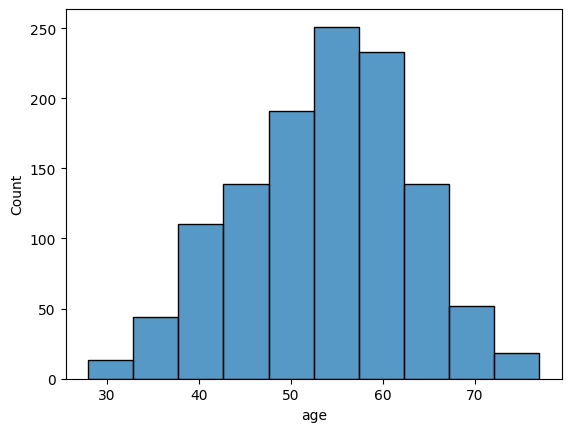

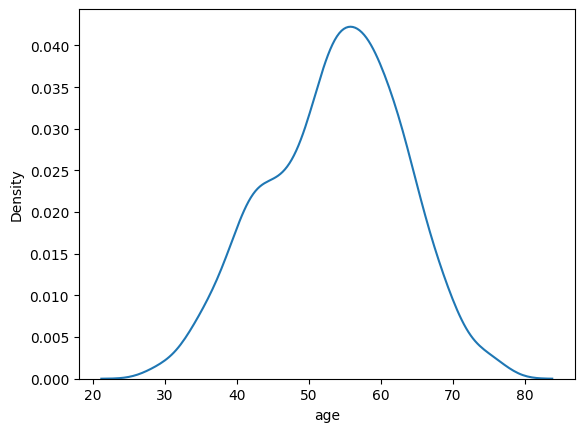

In [ ]:
# Histograma
sns.histplot(df['age'], bins=10)
plt.show()

# Diagrama de densidad
sns.kdeplot(df['age'])
plt.show()

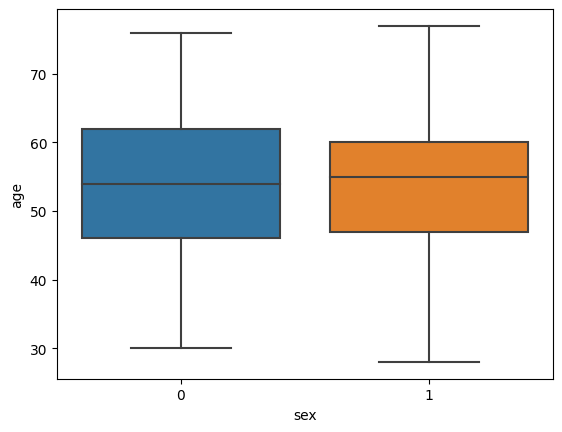

In [ ]:
# Diagramas de caja (Boxplots):
sns.boxplot(x='sex', y='age', data=df)
plt.show()

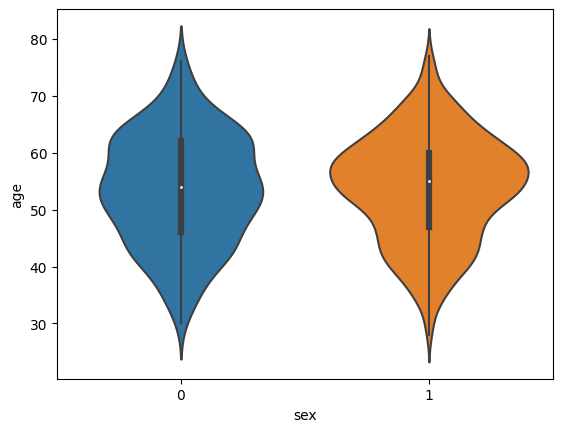

In [ ]:
# Diagramas de violín
sns.violinplot(x='sex', y='age', data=df)
plt.show()

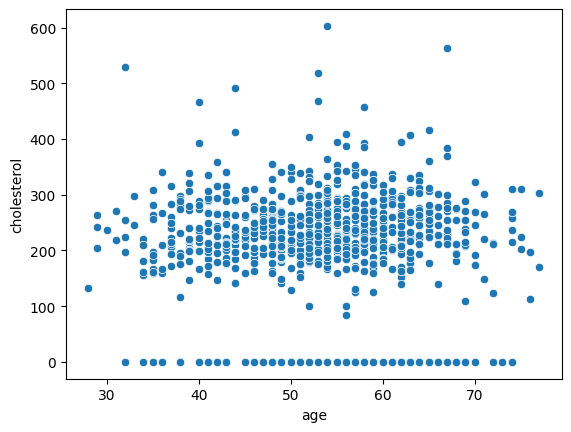

In [ ]:
# Diagramas de dispersión (Scatterplots)
sns.scatterplot(x='age', y='cholesterol', data=df)
plt.show()

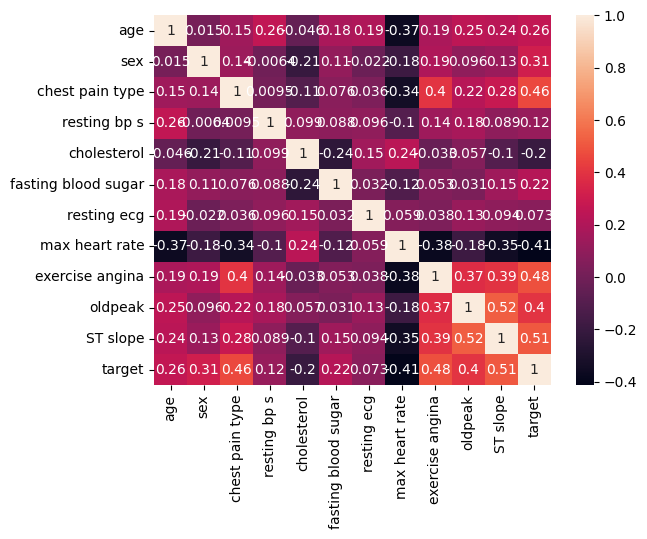

In [ ]:
# Diagramas de correlación (Correlation heatmaps)
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

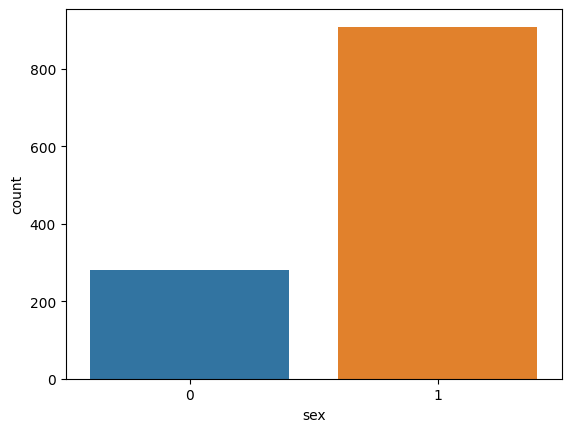

In [ ]:
# Gráficos de barras (Bar plots)
sns.countplot(x='sex', data=df)
plt.show()

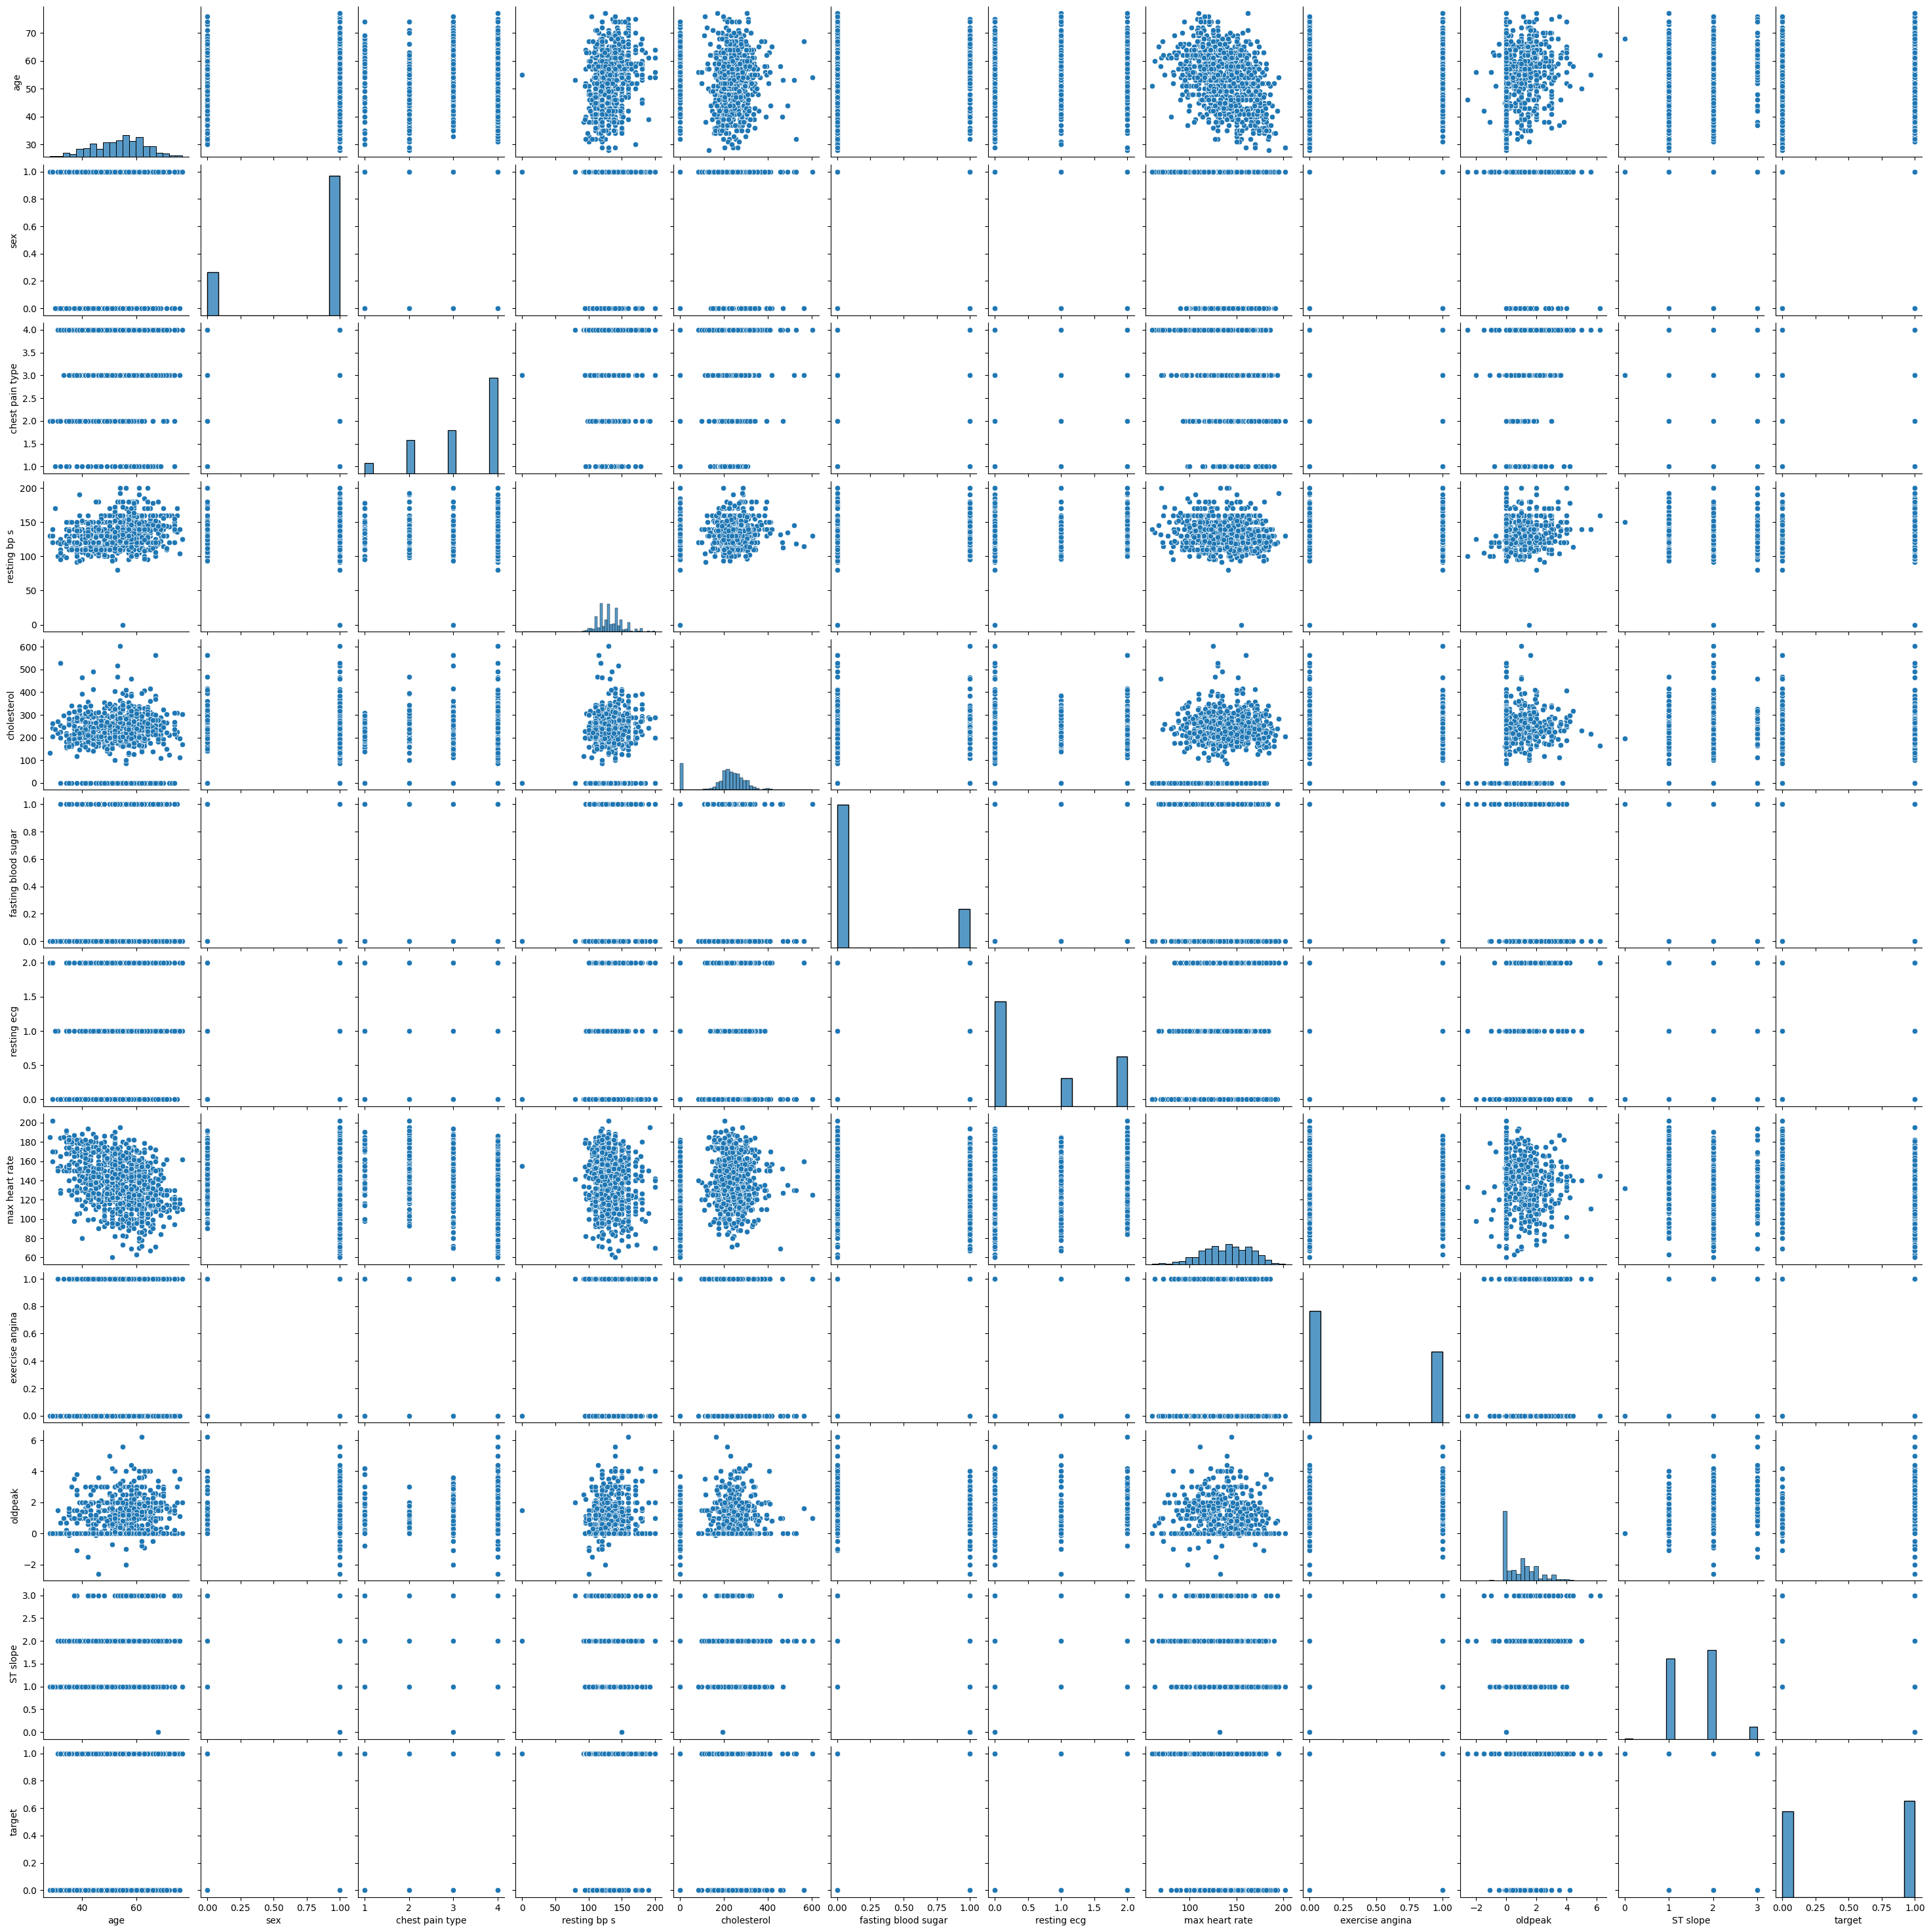

In [ ]:
# Gráficos de pares (Pair plots)
sns.pairplot(df)
plt.show()

Ahora pasamos a 2.4 Verificación de calidad de los datos

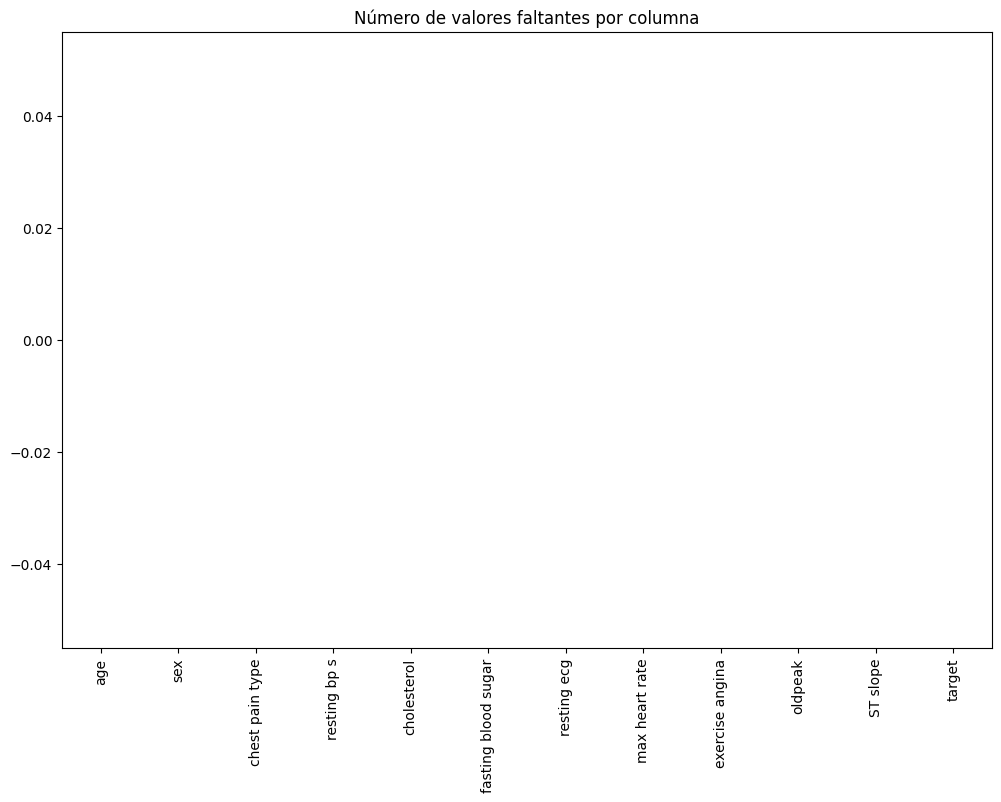

In [ ]:
# Comprobación de valores faltantes
import matplotlib.pyplot as plt
import seaborn as sns

missing_values = df.isnull().sum()
plt.figure(figsize=(12,8))
sns.barplot(x=missing_values.index, y=missing_values)
plt.xticks(rotation=90) # Nota: el valor de rotación es un número, no una cadena.
plt.title('Número de valores faltantes por columna')
plt.show()


<Axes: xlabel='age'>

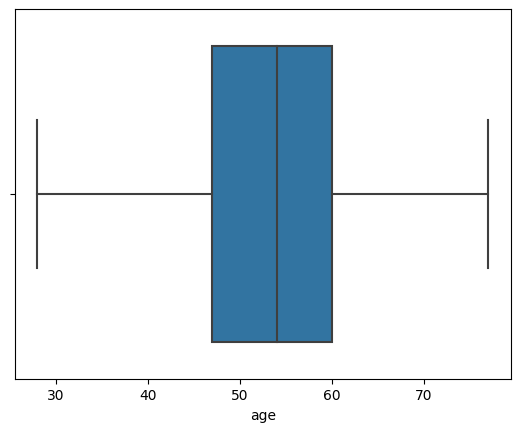

In [ ]:
# Detección de valores atípicos
import seaborn as sns
sns.boxplot(x=df['age'])

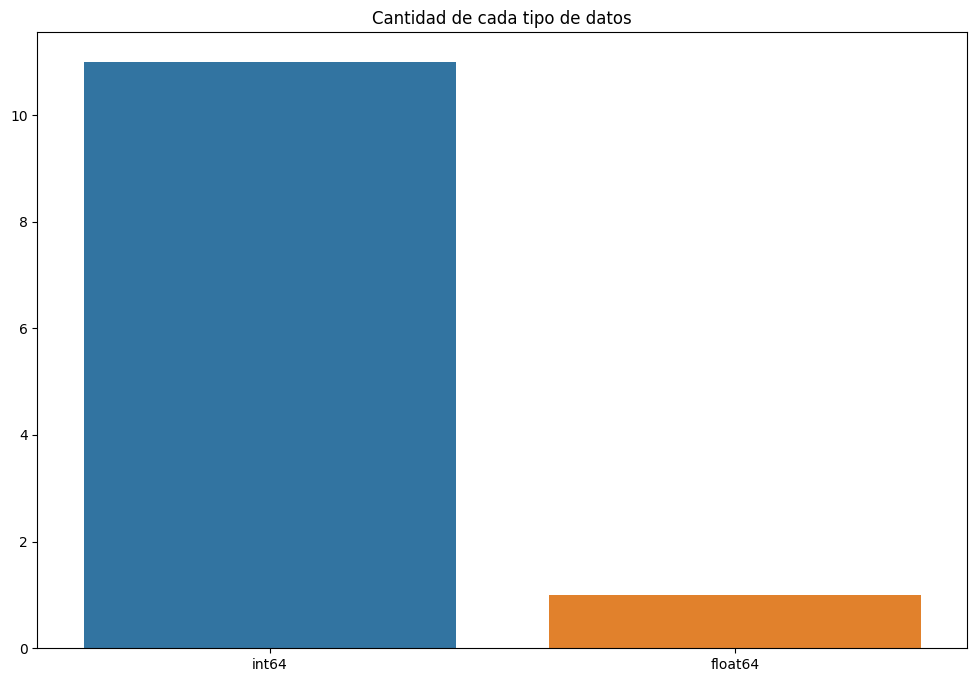

In [ ]:
# Comprobación de la consistencia de los datos
data_types = df.dtypes.value_counts()
plt.figure(figsize=(12,8))
sns.barplot(x=data_types.index, y=data_types)
plt.title('Cantidad de cada tipo de datos')
plt.show()

In [ ]:
# Normalizacion
from sklearn.preprocessing import StandardScaler

# Inicializa el escalador
scaler = StandardScaler()

# Ajusta el escalador a los datos (excluyendo la columna del objetivo)
scaler.fit(df.drop('target', axis=1))

# Transforma los datos
scaled_features = scaler.transform(df.drop('target', axis=1))

# Crea un nuevo DataFrame para los datos escalados
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])


3. Seleccion de datos

In [ ]:
# Lista de las características seleccionadas
selected_features = ['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol', 'resting ecg','max heart rate', 'exercise angina', 'oldpeak', 'ST slope']

# Seleccionamos solo las columnas de interés
df_selected = df[selected_features]


4. Modelacion

In [ ]:
# Regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Definir la variable objetivo
target = df['target']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(df_selected, target, test_size=0.2, random_state=42)

# Crear un objeto StandardScaler y ajustar a los datos de entrenamiento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Aplicar el mismo escalado al conjunto de prueba
X_test_scaled = scaler.transform(X_test)

# Crear el modelo de regresión logística
model = LogisticRegression()

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir las etiquetas para el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)

print(f'Precisión del modelo: {accuracy*100:.2f}%')

# Imprimir el informe de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo: 84.03%
              precision    recall  f1-score   support

           0       0.85      0.79      0.82       107
           1       0.83      0.89      0.86       131

    accuracy                           0.84       238
   macro avg       0.84      0.84      0.84       238
weighted avg       0.84      0.84      0.84       238



In [ ]:
# Arbol de decision
# Importamos los módulos necesarios
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Inicializamos el Clasificador de Árboles de Decisión
tree = DecisionTreeClassifier(random_state=42)

# Ajustamos el modelo con los datos de entrenamiento
tree.fit(X_train, y_train)

# Predecimos la variable objetivo para los datos de prueba
y_pred_tree = tree.predict(X_test)

# Calculamos la precisión del modelo
tree_accuracy = accuracy_score(y_test, y_pred_tree)

# Imprimimos la precisión
print(f"La precisión del Clasificador de Árboles de Decisión es: {tree_accuracy*100:.2f}%")

La precisión del Clasificador de Árboles de Decisión es: 88.24%


In [ ]:
# Máquinas de vectores de soporte (SVM)
# Importamos los módulos necesarios
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Inicializamos el clasificador SVM
svm = SVC(random_state=42)

# Ajustamos el modelo con los datos de entrenamiento
svm.fit(X_train, y_train)

# Predecimos la variable objetivo para los datos de prueba
y_pred_svm = svm.predict(X_test)

# Calculamos la precisión del modelo
svm_accuracy = accuracy_score(y_test, y_pred_svm)

# Imprimimos la precisión
print(f"La precisión del Clasificador de Máquinas de Vectores de Soporte es: {svm_accuracy*100:.2f}%")

La precisión del Clasificador de Máquinas de Vectores de Soporte es: 73.11%


In [ ]:
# K-Nearest Neighbors (KNN)
# Importamos los módulos necesarios
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Inicializamos el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=5)

# Ajustamos el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

# Predecimos la variable objetivo para los datos de prueba
y_pred_knn = knn.predict(X_test)

# Calculamos la precisión del modelo
knn_accuracy = accuracy_score(y_test, y_pred_knn)

# Imprimimos la precisión
print(f"La precisión del Clasificador de K-Nearest Neighbors es: {knn_accuracy*100:.2f}%")

La precisión del Clasificador de K-Nearest Neighbors es: 71.85%


In [ ]:
# Redes neuronales
!pip install tensorflow keras
# Importamos los módulos necesarios
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# Creamos el modelo
model = Sequential()

# Añadimos la capa de entrada y la primera capa oculta
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))

# Añadimos la capa de salida
model.add(Dense(units=1, activation='sigmoid'))

# Compilamos el modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Ajustamos el modelo con los datos de entrenamiento
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Predecimos la variable objetivo para los datos de prueba
y_pred_nn = model.predict(X_test)
y_pred_nn = [1 if y > 0.5 else 0 for y in y_pred_nn]  # Convertimos las probabilidades en clases

# Calculamos la precisión del modelo
nn_accuracy = accuracy_score(y_test, y_pred_nn)

# Imprimimos la precisión
print(f"La precisión de la Red Neuronal es: {nn_accuracy*100:.2f}%")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Epoch 1/100
30/30 [==============================] - 1s 2ms/step - loss: 7.8028 - accuracy: 0.4968
Epoch 2/100
30/30 [==============================] - 0s 2ms/step - loss: 1.4889 - accuracy: 0.6376
Epoch 3/100
30/30 [==============================] - 0s 2ms/step - loss: 0.8914 - accuracy: 0.7080
Epoch 4/100
30/30 [==============================] - 0s 2ms/step - loss: 0.7617 - accuracy: 0.7101
Epoch 5/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6983 - accuracy: 0.7038
Epoch 6/100
30/30 [==============================] - 0s 2ms/step - loss: 0.6375 - accuracy: 0.7132
Epoch 7/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5982 - accuracy: 0.7426
Epoch 8/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5777 - accuracy: 0.7416
Epoch 9/100
30/30 [==============================] - 0s 3ms/step - loss: 0.5415 - accuracy: 0.7500
Epoch 10/1

In [ ]:
# Random Forest
# Importamos el módulo necesario
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Creamos el modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)

# Ajustamos el modelo con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecimos la variable objetivo para los datos de prueba
y_pred_rf = rf_model.predict(X_test)

# Calculamos la precisión del modelo
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Imprimimos la precisión
print(f"La precisión de Random Forest es: {rf_accuracy*100:.2f}%")


La precisión de Random Forest es: 95.80%
